In [1]:
#-c anaconda py-opencv

In [2]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib auto

Using matplotlib backend: agg


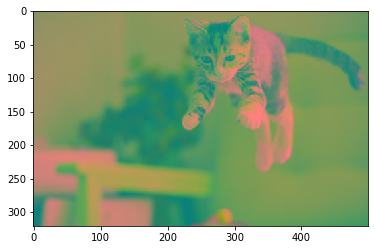

In [3]:
#reading the image 
cat1 = cv2.imread('index.png')
cat1 = cv2.cvtColor(cat1,cv2.COLOR_BGR2RGB)
cat2 = cv2.cvtColor(cat1,cv2.COLOR_BGR2HSV)
cat3 = cv2.cvtColor(cat1,cv2.COLOR_BGR2YUV)

#plotting the image
plt.imshow(cat3)

In [4]:
fleur = cv2.imread('fleur.png')
fleur = cv2.cvtColor(fleur,cv2.COLOR_BGR2HSV)

In [5]:
#plotting the image
#cv2.imshow('toto', fleur)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [6]:
import glob
cheminee = cv2.imread('./Images/cheminee.png')
bougie = cv2.imread('./Images/bougie.jpg')
cierge = cv2.imread('./Images/cierge.jpg')

In [7]:
#converting image to size (100,100,3) 
smaller_cheminee = cv2.resize(cheminee,(100,100),interpolation = cv2.INTER_LINEAR) 
smaller_bougie = cv2.resize(bougie,(100,100),interpolation = cv2.INTER_LINEAR) 
smaller_cierge = cv2.resize(cierge,(100,100),interpolation = cv2.INTER_LINEAR) 

In [8]:
#saving image
cv2.imwrite('cheminee_resized.jpg',cheminee)
cv2.imwrite('bougie_resized.jpg',bougie)
cv2.imwrite('cierge_resized.jpg',cierge)

True

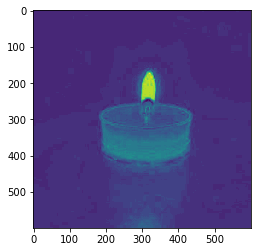

In [206]:
bougie = cv2.imread('bougie_resized.jpg')
bougie = cv2.cvtColor(bougie,cv2.COLOR_BGR2YUV)
gray = cv2.cvtColor(bougie,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(gray)

In [55]:
import numpy as np
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [56]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

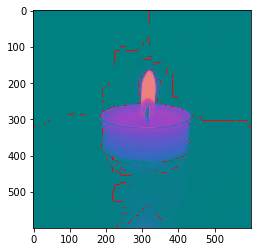

In [59]:
markers = cv2.watershed(bougie,markers)
bougie[markers == -1] = [255,0,0]
plt.imshow(bougie)

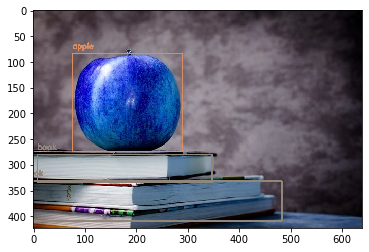

In [39]:
import cvlib as cv
from cvlib.object_detection import draw_bbox
im = cv2.imread('apple-256261_640.jpg')
bbox, label, conf = cv.detect_common_objects(im)
output_image = draw_bbox(im, bbox, label, conf)
plt.imshow(output_image)
plt.show()

In [60]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

In [62]:
len(flags)

274

In [63]:
flags[40]

'COLOR_BGR2HLS'

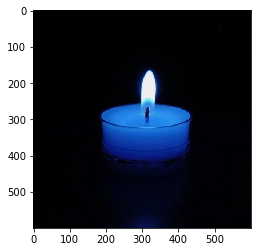

In [90]:
bougie = cv2.imread('./bougie_resized.jpg')
plt.imshow(bougie)
plt.show()

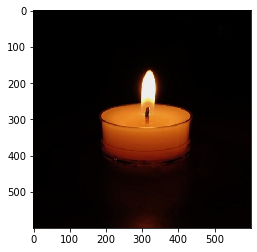

In [91]:
bougie = cv2.cvtColor(bougie, cv2.COLOR_BGR2RGB)
plt.imshow(bougie)
plt.show()

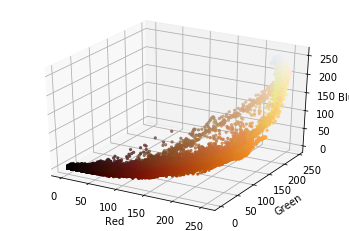

In [94]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

r, g, b = cv2.split(bougie)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = bougie.reshape((np.shape(bougie)[0]*np.shape(bougie)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
# Now we have all the components ready for plotting: the pixel positions for each axis and their corresponding colors, in the format facecolors expects. You can build the scatter plot and view it:

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

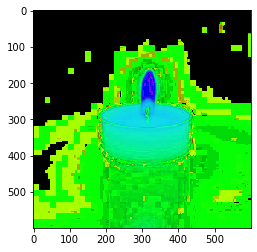

In [95]:
hsv_bougie = cv2.cvtColor(bougie, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_bougie)

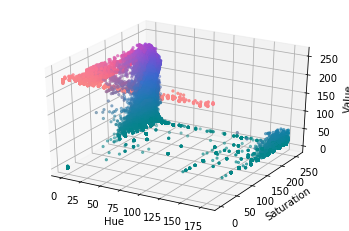

In [99]:
h, s, v = cv2.split(hsv_bougie)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

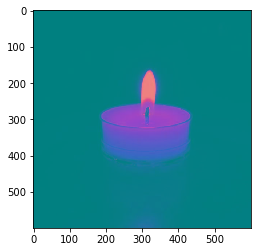

In [97]:
yuv_bougie = cv2.cvtColor(bougie, cv2.COLOR_RGB2YUV)
plt.imshow(yuv_bougie)

In [173]:
light_rose = (0, 50, 100)
dark_rose = (60, 190, 255)

In [174]:
mask = cv2.inRange(hsv_bougie, light_rose, dark_rose)

In [175]:
result = cv2.bitwise_and(bougie, bougie, mask=mask)

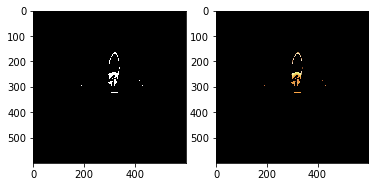

In [176]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

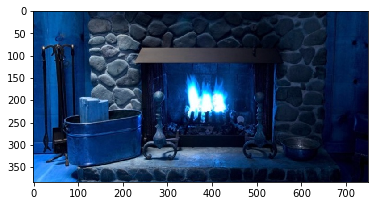

In [177]:
cheminee = cv2.imread('./cheminee_resized.jpg')
plt.imshow(cheminee)
plt.show()

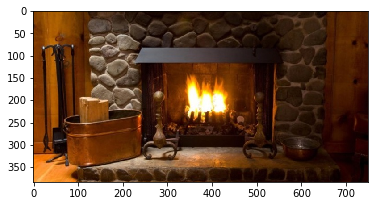

In [179]:
cheminee = cv2.cvtColor(cheminee, cv2.COLOR_BGR2RGB)
plt.imshow(cheminee)
plt.show()

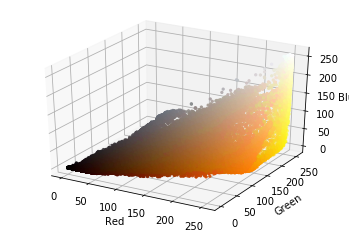

In [181]:
r, g, b = cv2.split(cheminee)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = cheminee.reshape((np.shape(cheminee)[0]*np.shape(cheminee)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
# Now we have all the components ready for plotting: the pixel positions for each axis and their corresponding colors, in the format facecolors expects. You can build the scatter plot and view it:

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

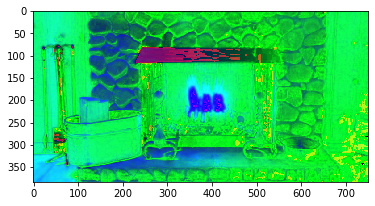

In [183]:
hsv_cheminee = cv2.cvtColor(cheminee, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_cheminee)

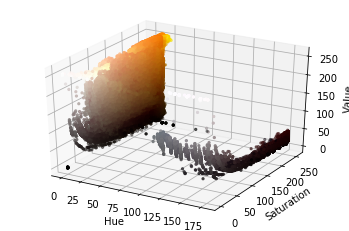

In [184]:
h, s, v = cv2.split(hsv_cheminee)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [239]:
light_orange = (1, 200, 200)
dark_orange = (20, 255, 255)

In [240]:
mask = cv2.inRange(hsv_cheminee, light_orange, dark_orange)

In [241]:
result = cv2.bitwise_and(cheminee, cheminee, mask=mask)

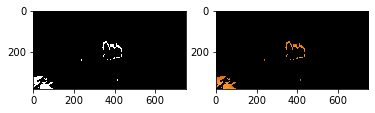

In [242]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [245]:
img = cv2.imread('./coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [247]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [248]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [249]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

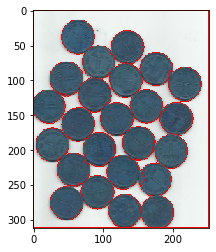

In [250]:
plt.imshow(img)

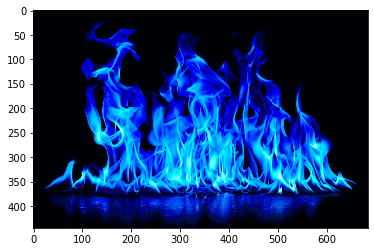

In [257]:
im = cv2.imread('./Feu.PNG')
bbox, label, conf = cv.detect_common_objects(im)
output_image = draw_bbox(im, bbox, label, conf)
plt.imshow(output_image)
plt.show()

In [258]:
img = cv2.imread('./Feu.PNG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [259]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [260]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [261]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

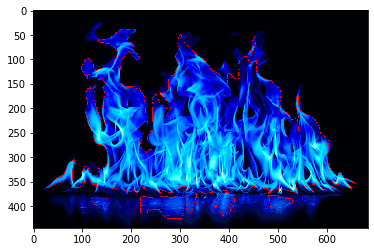

In [262]:
plt.imshow(img)